# Tasks details:
--------------
1. Scraping historical closing price of BTC and ETH from CoinMarketCap from 01-01-2016 till today. 

Hints: the URLs are: 
https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20160101&end=20190619
https://coinmarketcap.com/currencies/ethereum/historical-data/?start=20160101&end=20190619

In [4]:
from cmc import coinmarketcap
from datetime import datetime
import matplotlib.pyplot as plt
crypto = ['bitcoin','ethereum']
start_date, end_date = datetime(2016,1,1), datetime(2019,6,19)
df_cryptos = coinmarketcap.getDataFor(crypto, start_date, end_date, fields = ['Close'])
print(df_cryptos)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.07s/it]


            bitcoin    ethereum
              Close       Close
Date                           
2016-01-01   434.33    0.948024
2016-01-02   433.44    0.937124
2016-01-03   430.01    0.971905
2016-01-04   433.09    0.954480
2016-01-05   431.96    0.950176
2016-01-06   429.11    0.950860
2016-01-07   458.05    0.942005
2016-01-08   453.23    0.986789
2016-01-09   447.61    0.986833
2016-01-10   447.99    0.999231
2016-01-11   448.43    1.060000
2016-01-12   435.69    1.140000
2016-01-13   432.37    1.130000
2016-01-14   430.31    1.190000
2016-01-15   364.33    1.210000
2016-01-16   387.54    1.220000
2016-01-17   382.30    1.330000
2016-01-18   387.17    1.430000
2016-01-19   380.15    1.370000
2016-01-20   420.23    1.530000
2016-01-21   410.26    1.550000
2016-01-22   382.49    1.500000
2016-01-23   387.49    1.970000
2016-01-24   402.97    2.140000
2016-01-25   391.73    2.500000
2016-01-26   392.15    2.280000
2016-01-27   394.97    2.390000
2016-01-28   380.29    2.530000
2016-01-

# 2. Plotting the price of these two coins

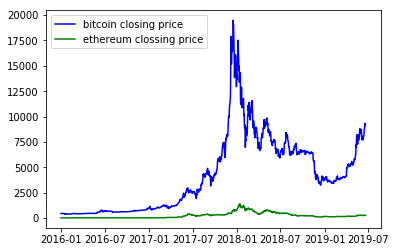

In [5]:
plt.plot(df_cryptos['bitcoin'], 'b')
plt.plot(df_cryptos['ethereum'], 'g')
plt.legend(['bitcoin closing price','ethereum clossing price'])
plt.show()

# 3. Compute and plot the daily return for the time period

Calculate Daily Return
***********************
Find in the historical prices section the stock’s closing price for any two consecutive days. For example, assume a stock’s closing price was $36.75 yesterday and that its closing price was $35.50 the previous day. Subtract the previous day’s closing price from the most recent day’s closing price. In this example, subtract $35.50 from $36.75 to get $1.25.

Divide your Step 4 result by the previous day’s closing price to calculate the daily return. Multiply this result by 100 to convert it to a percentage. Continuing with the example, divide $1.25 by $35.50 to get 0.035. Multiply 0.035 by 100 to get a 3.5 percent return for that day. This means that the stock’s price increased by 3.5 percent over the previous day’s closing price

1266


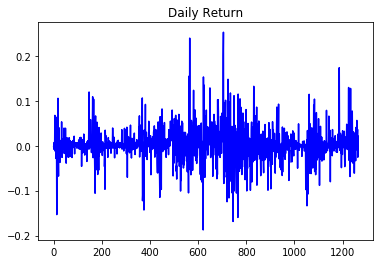

In [48]:
print(len(df_cryptos['bitcoin']))
dailyReturn = []
for p in range(1,len(df_cryptos['bitcoin'])):
    dailyReturn.append(round((df_cryptos['bitcoin']['Close'][p] - df_cryptos['bitcoin']['Close'][p-1]),2)/df_cryptos['bitcoin']['Close'][p-1])
plt.plot(dailyReturn,'b')
plt.title("Daily Return")
plt.show()

# 4. Compute and plot the 7-day and 30-day moving average of the closing prices of these two coins